In [ ]:
!pip install av

In [2]:
import torch
from torchvision.datasets.video_utils import VideoClips
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Lambda, Resize, ToTensor

In [3]:
from google.colab import drive
drive.mount('/content/drive')
steamboat_willie_path = '/content/drive/My Drive/SteamboatWillie.mp4'

Mounted at /content/drive


In [4]:
transforms = Compose([
    Lambda(lambda x: x.permute(3, 0, 1, 2)),  # Change shape from (T, H, W, C) to (C, T, H, W)
    Lambda(lambda x: Resize((128, 128))(x)),  # Resize frames
    Lambda(lambda x: x / 255.),  # Scale pixel values to [0, 1]
])

In [6]:
video_clips = VideoClips([steamboat_willie_path], clip_length_in_frames=16, frames_between_clips=16, frame_rate=None)

100%|██████████| 1/1 [00:25<00:00, 25.53s/it]


In [ ]:
dir(video_clips)

In [25]:
clip, _, _, _ = video_clips.get_clip(50)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [32]:
clip[0][:, 120:710, :].shape

torch.Size([480, 590, 3])

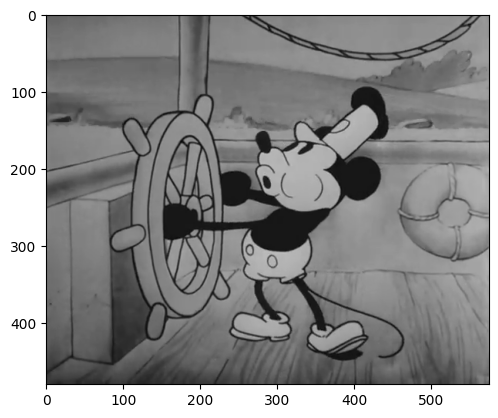

In [49]:
import matplotlib.pyplot as plt
plt.imshow(clip[0][:, 140:715, :])

In [ ]:
clip_transformed = transforms(clip)

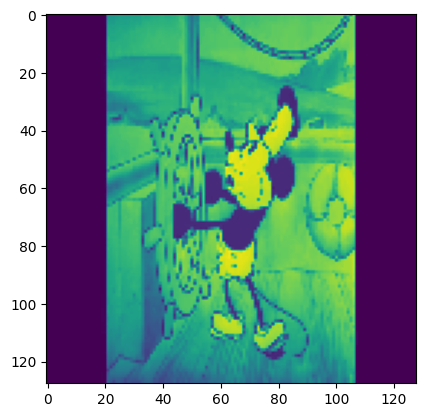

In [31]:
plt.imshow(clip_transformed[0][0])